In [17]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler ,FunctionTransformer ,OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:

pd.set_option('display.max_columns', None)

### 1. 7 class

- 수정하기 ////////////// 차원 축소 후 -> 군집화 수행

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('./DBSCAN_7_Muti_train.csv')
df

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,0,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,0,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,0,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,1,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004753,0.972774,-0.067112,0.361493,0.333333,0.7,0.482455,1,0.132035,-1.212972,-0.343383,1.908944,1.378394,2.542750,0.0,-0.815491,0.0,0.261286,0.320988,1
2004754,0.972774,-0.542430,0.256419,0.166667,1.0,0.811608,1,1.911487,2.233894,1.410475,0.319929,-0.474547,2.883691,0.0,1.316633,0.0,0.406293,0.320988,1
2004755,2.730103,-0.542430,1.557804,0.166667,0.9,3.824623,1,-0.664249,-1.212972,-0.343383,-0.425876,0.582527,1.093749,0.0,0.783602,0.0,0.340629,0.320988,1
2004756,0.972774,0.284211,0.441207,0.333333,0.6,0.862247,2,-0.020025,-0.305902,1.410475,0.089640,0.713131,0.582337,0.0,0.250571,1.0,0.268126,0.320988,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004758 entries, 0 to 2004757
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       float64
 4   emp_length                  float64
 5   annual_inc                  float64
 6   loan_status                 int64  
 7   dti                         float64
 8   open_acc                    float64
 9   pub_rec                     float64
 10  revol_bal                   float64
 11  revol_util                  float64
 12  total_acc                   float64
 13  collections_12_mths_ex_med  float64
 14  mort_acc                    float64
 15  pub_rec_bankruptcies        float64
 16  cr_line_period              float64
 17  issue_d_period              float64
 18  emp                         int64  
dtypes: float64(17), int64

In [ ]:
feature_names = ['loan_amnt' , 'int_rate','installment','grade','emp_length','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','collections_12_mths_ex_med','mort_acc','pub_rec_bankruptcies','cr_line_period','issue_d_period','emp']
df_db = pd.DataFrame(data = df, columns = feature_names)
df_db['loan_status'] = df['loan_status']
df_db.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1,0
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1,0
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1,0
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1,1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1,0


In [5]:
df['loan_status'].value_counts()

0    959566
1    778267
2    236706
3     18911
4      7528
5      3748
8        32
Name: loan_status, dtype: int64

In [6]:
#from sklearn.neighbors import NearestNeighbors
# k-거리 계산
#neighbors = NearestNeighbors(n_neighbors=2)
#neighbors_fit = neighbors.fit(df)
#distances, indices = neighbors_fit.kneighbors(df)

# 거리 정렬 및 그래프 그리기
#distances = np.sort(distances, axis=0)
#distances = distances[:, 1]
#plt.plot(distances)
#plt.xlabel('Points')
#plt.ylabel('Distance to 2nd Nearest Neighbor')
#plt.show()

In [7]:

#eps = [1, 4, 8, 12, 20]

#for i in eps:
#    dbscan = DBSCAN(eps=i, min_samples=33, metric='euclidean')
#    cluster_labels = dbscan.fit_predict(df)  
    
#    cluster_id = pd.DataFrame(cluster_labels, columns=['cluster'])
    
#    d2 = pd.concat([df, cluster_id], axis=1)
#    d2.columns = list(df.columns) + ["cluster"]
    
    
#    sns.scatterplot(x=d2[df.columns[0]], y=d2[df.columns[1]], hue=d2['cluster'], legend="full")
#    plt.title('DBScan with eps {}'.format(i))
#    plt.show()
    
#    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d2.iloc[:, :-1], d2['cluster'])))
#    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d2.iloc[:, :-1], d2['cluster'])))


## PCA 

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(df)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
df_db['ftr1'] = pca_transformed[:,0]
df_db['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)

## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components= 2)

lda_transformed = lda.fit_transform(df, df_db['loan_status'])

df_db['ftr1'] = lda_transformed[:,0]
df_db['ftr2'] = lda_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN( 
    eps=0.7,
    min_samples=8,
    metric='euclidean'     
)

dbscan_labels = dbscan.fit_predict(df)
df_db['dbscan_cluster'] = dbscan_labels

df_db.head(5)



,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status,dbscan_cluster
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1,0,0
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1,0,-1
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1,0,-1
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1,1,-1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1,0,-1


In [9]:
df['dbscan_cluster'] = dbscan_labels

In [10]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^' , '%' , '$' , '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [11]:
df_db['dbscan_cluster'].value_counts()

-1       1439405
 0        277742
 2        221216
 1         29921
 3         14264
          ...   
 456           2
 394           2
 143           2
 214           2
 1065          2
Name: dbscan_cluster, Length: 1433, dtype: int64

In [23]:
df_db.head(5)

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status,dbscan_cluster,ftr1,ftr2
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,...,0.0,-0.282460,0.0,0.201094,0.444444,1,0,0,-3.434410,-2.509620
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,...,0.0,1.316633,0.0,0.261286,0.444444,1,0,-1,-4.437797,2.303193
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,...,0.0,1.849664,0.0,0.250342,0.444444,1,0,-1,-4.435694,-0.165126
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,...,0.0,-0.282460,0.0,0.117647,0.444444,1,1,-1,-4.436643,1.421688
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,...,0.0,2.382695,0.0,0.285910,0.444444,1,0,-1,-4.437766,1.097376


In [25]:
df_db['dbscan_cluster'].value_counts()

-1       1439405
 0        277742
 2        221216
 1         29921
 3         14264
          ...   
 456           2
 394           2
 143           2
 214           2
 1065          2
Name: dbscan_cluster, Length: 1433, dtype: int64

In [22]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components= 2)

lda_transformed = lda.fit_transform(df, df_db['loan_status'])

df_db['ftr1'] = lda_transformed[:,0]
df_db['ftr2'] = lda_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)

ValueError: Negative values in data passed to LatentDirichletAllocation.fit

ValueError: Unrecognized marker style '%'

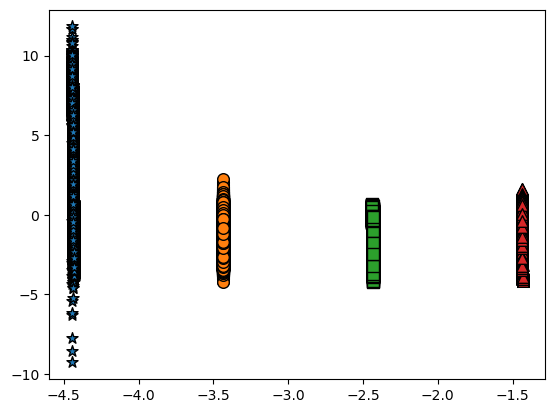

In [18]:
from sklearn.decomposition import PCA
import numpy as np

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(df)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
df_db['ftr1'] = pca_transformed[:,0]
df_db['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)